<p align="center"><h1 align="center">QMSS5074GR <br> Projects in Advanced Machine Learning <br>Fall 2024 <br> FINAL PROJECT<br>Assignment 3 [GROUP Assignment]</h1>

---
<br>

#### **Your Unis** : xh2604, mm6712
#### **Your Full names** : Xiyun Hu, Mathis Mallet
#### **Link to your Public Github repository** : https://github.com/MathisMallet/Advanced-Machine-Learning-3


## **Stanford Sentiment Treebank - Movie Review Classification**

## Instructions for Part 1 (simple models):
1.   Get data in and set up X_train / X_test / y_train
2.   Preprocess data using Sklearn TFIDF Vectorizer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model
4. Generate predictions from X_test data



### 1. Get dataset in and set up training, validation and test data

In [ ]:
# IMPORT DATA
!git clone https://github.com/YJiangcm/SST-2-sentiment-analysis.git

Cloning into 'SST-2-sentiment-analysis'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 85 (delta 44), reused 29 (delta 11), pack-reused 0 (from 0)
Receiving objects: 100% (85/85), 478.79 KiB | 1.72 MiB/s, done.
Resolving deltas: 100% (44/44), done.


In [ ]:
# Set up X_train, X_test, and y_train_labels objects
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=Warning)

headers = ['sentiment', 'review'] #the sentiment column contains the label of the reviews

train_df = pd.read_csv('SST-2-sentiment-analysis/data/train.tsv', sep='\t', names=headers)
val_df = pd.read_csv('SST-2-sentiment-analysis/data/dev.tsv', sep='\t', names=headers)
test_df = pd.read_csv('SST-2-sentiment-analysis/data/test.tsv', sep='\t', names=headers)

train_df.head(5)

,sentiment,review
0,1,"a stirring , funny and finally transporting re..."
1,0,apparently reassembled from the cutting-room f...
2,0,they presume their audience wo n't sit still f...
3,1,this is a visually stunning rumination on love...
4,1,jonathan parker 's bartleby should have been t...


Note: 0 is negative and 1 is positive.

In [ ]:
# From train_df
X_train = train_df['review']
y_train = train_df['sentiment']

# From val_df
X_val = val_df['review']
y_val = val_df['sentiment']

# From test_df
X_test = test_df['review']
y_test = test_df['sentiment']

In [ ]:
print(y_train.value_counts())
print(y_val.value_counts())
print(y_test.value_counts())
#The datasets are already well-balanced

sentiment
1    3610
0    3310
Name: count, dtype: int64
sentiment
1    444
0    428
Name: count, dtype: int64
sentiment
0    912
1    909
Name: count, dtype: int64


###2.   Preprocess data and Analyze


In [ ]:
# Build a Document-Term Matrix (DTM) out of words in the training set
# Remove stop words that occur too frequently to be useful, and
# Use Term Frequency - Inverse Document Frequency (TF-IDF) formula to weight by how common words are generally

**Building DTM using bag of words. Specify stop words in CountVectorizer.**

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [ ]:
vectorizer = TfidfVectorizer(stop_words="english", max_df = 0.8).fit(X_train) #ignore the words that appeared in more than 80% of the docs
X = vectorizer.transform(X_train)

**Take a look at the features.**

In [ ]:
feature_names = vectorizer.get_feature_names_out()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 210 to 230:\n{}".format(feature_names[210:230]))
print("Every 200th feature:\n{}".format(feature_names[::200]))

Number of features: 13506
First 20 features:
['000' '10' '100' '101' '103' '105' '10th' '11' '110' '112' '12' '120'
 '127' '129' '12th' '13' '13th' '14' '140' '146']
Features 210 to 230:
['accused' 'ace' 'acerbic' 'ache' 'achieve' 'achieved' 'achievement'
 'achievements' 'achieves' 'achieving' 'aching' 'achingly' 'achival'
 'achronological' 'acid' 'acidic' 'acidity' 'ackerman' 'acknowledges'
 'acknowledging']
Every 200th feature:
['000' 'according' 'ahead' 'answered' 'assume' 'bang' 'bidder' 'boot'
 'built' 'carousel' 'chest' 'clothes' 'comprise' 'conveyor' 'crocodile'
 'decibel' 'despair' 'dislocation' 'dramatized' 'eee' 'enlivens'
 'exception' 'falls' 'fingers' 'formidable' 'ganesh' 'golf' 'gunfire'
 'hedonistic' 'horton' 'impassive' 'inhale' 'irish' 'jumble' 'laid'
 'lifelong' 'lucy' 'masculine' 'midsection' 'mornings' 'neatly'
 'obstacles' 'overladen' 'paths' 'pies' 'portent' 'proceeds' 'putrid'
 'reassuring' 'removed' 'richness' 'sabara' 'scott' 'sexist' 'simpson'
 'snaps' 'spirit

**Perform EDA and Visualizations (class balance, review lengths, word frequency per class, Wordcloud, etc)**

In [ ]:
# EDA and Viz code

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

Class balance
* Negative and positive reviews in train, val, and test set are about even.


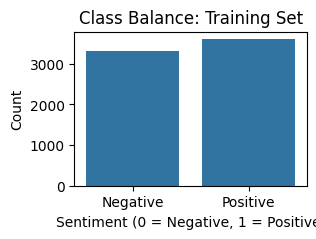

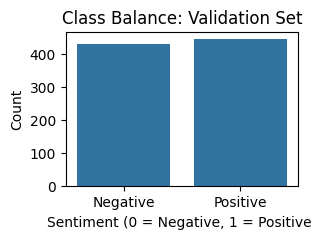

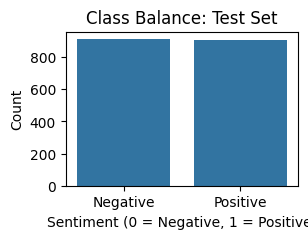

In [ ]:
def plot_class_balance(y_data, title):
    counts = y_data.value_counts()
    plt.figure(figsize=(3, 2))
    sns.barplot(x=counts.index, y=counts.values)
    plt.title(f"Class Balance: {title}")
    plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
    plt.ylabel("Count")
    plt.xticks([0, 1], ["Negative", "Positive"])
    plt.show()

# Plot class balance for train, validation, and test sets
plot_class_balance(y_train, "Training Set")
plot_class_balance(y_val, "Validation Set")
plot_class_balance(y_test, "Test Set")

Word frequency per class

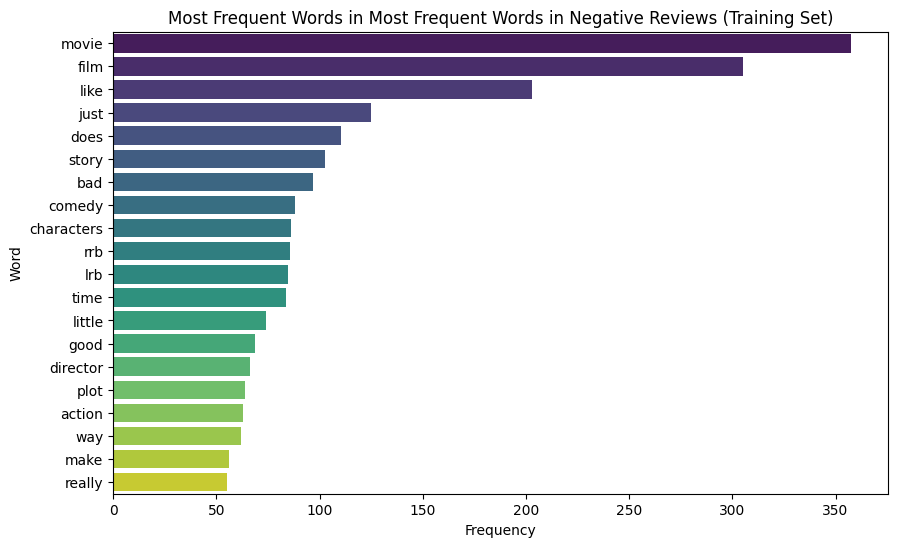

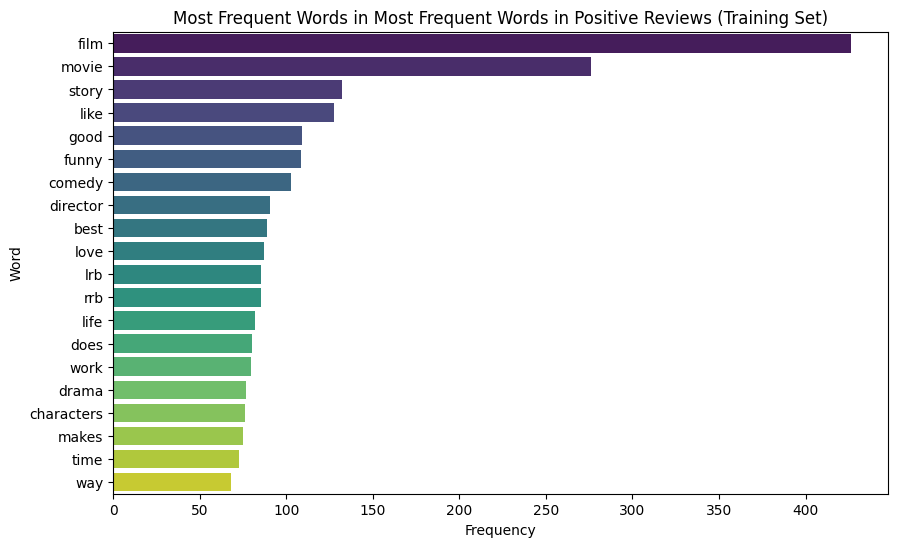

In [ ]:
negative_reviews = train_df[train_df['sentiment'] == 0]['review']
positive_reviews = train_df[train_df['sentiment'] == 1]['review']

def plot_word_frequency(reviews, title):
  vectorizer = TfidfVectorizer(stop_words="english",max_df=0.8, max_features=20)
  word_count = vectorizer.fit_transform(reviews).toarray().sum(axis=0)
  words = pd.DataFrame({
      "word": vectorizer.get_feature_names_out(),
      "count": word_count
  }).sort_values(by="count", ascending=False)
  plt.figure(figsize=(10, 6))
  sns.barplot(data=words, x="count", y="word", palette="viridis")
  plt.title(f"Most Frequent Words in {title}")
  plt.xlabel("Frequency")
  plt.ylabel("Word")
  plt.show()

plot_word_frequency(negative_reviews, "Most Frequent Words in Negative Reviews (Training Set)")
plot_word_frequency(positive_reviews, "Most Frequent Words in Positive Reviews (Training Set)")

Wordcloud
* From the negative wordcloud, the word 'bad' is pretty obvious.
* From the positive wordcloud, we can see words like 'best', 'good', 'funny'

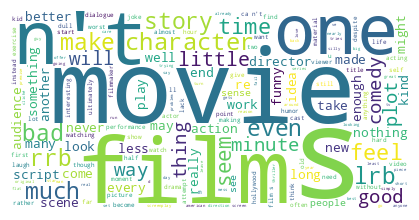

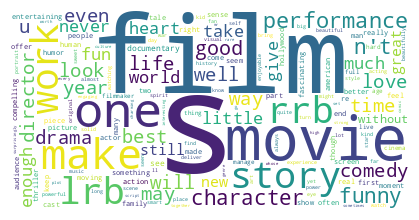

In [ ]:
negative_reviews = train_df[train_df['sentiment'] == 0]['review']
positive_reviews = train_df[train_df['sentiment'] == 1]['review']

negative_txt = ' '.join(negative_reviews)
positive_txt = ' '.join(positive_reviews)

wordcloud_neg = WordCloud(
                background_color ='white',
                stopwords = set(STOPWORDS)).generate(negative_txt)

wordcloud_pos = WordCloud(
                background_color ='white',
                stopwords = set(STOPWORDS)).generate(positive_txt)

plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud_neg)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud_pos)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Review length
* The distributions of length of negative and positive reviews are similar and slightly right skewed.


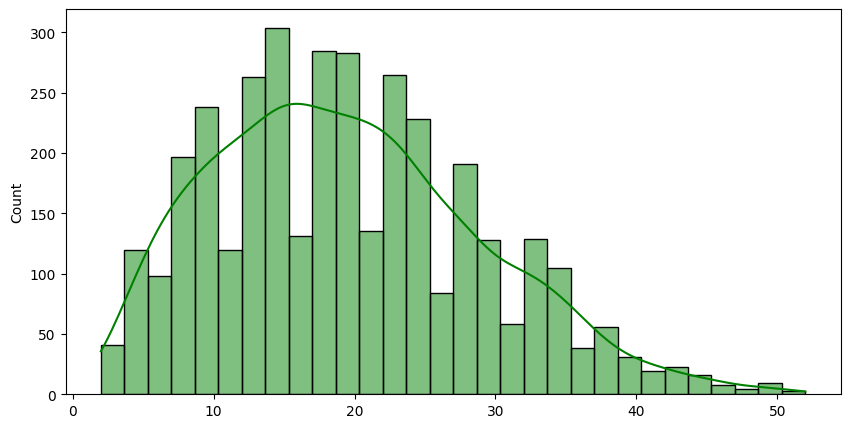

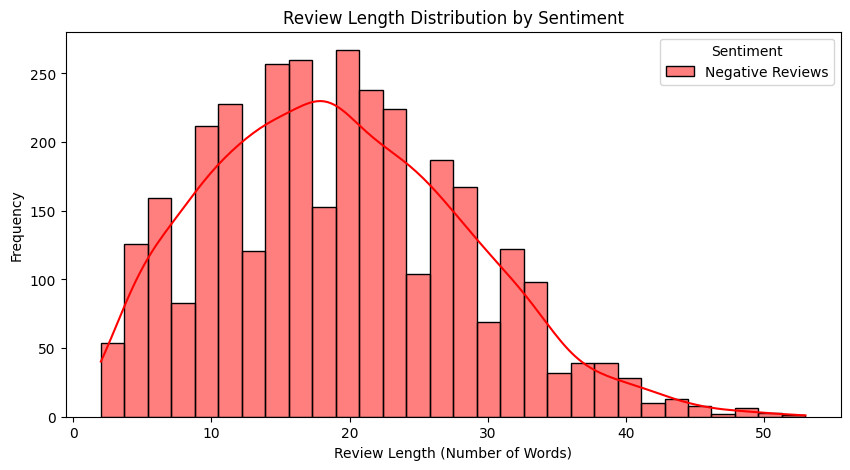

In [ ]:
# Separate visualization for positive and negative reviews
positive_lengths = [len(review.split()) for review in X_train[y_train == 1]]
negative_lengths = [len(review.split()) for review in X_train[y_train == 0]]

plt.figure(figsize=(10, 5))
sns.histplot(positive_lengths, kde=True, color="green", label="Positive Reviews", bins=30)
plt.figure(figsize=(10, 5))
sns.histplot(negative_lengths, kde=True, color="red", label="Negative Reviews", bins=30)
plt.title("Review Length Distribution by Sentiment")
plt.xlabel("Review Length (Number of Words)")
plt.ylabel("Frequency")
plt.legend(title="Sentiment")
plt.show()

If you think lemmatization, stemming and other text preprocessing should be performed, code here. You can also go back and include it in the preprocessing function if you want.

You are also free to include any extra features that you extract from the text to aid in modeling (Optional)

In [ ]:
# additional preprocessing does not seem necessary, but could be tested

**After the EDA, let's try adding lemmatization and n-gram into our preprocessing procedure.**

In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text)
    return [lemmatizer.lemmatize(token) for token in tokens]

vectorizer = TfidfVectorizer(
    stop_words="english",
    tokenizer=tokenize_and_lemmatize,
    ngram_range=(1, 2),
    max_df=0.8).fit(X_train)


**Writing a preprocessor function**

In [ ]:
# Write function to transform data with preprocessor
# New samples will be put into a DTM based on vocabularly from training set

def preprocessor(data, vectorizer = vectorizer):
  X = vectorizer.transform(data)
  return X

print(preprocessor(X_train).shape)
print(preprocessor(X_test).shape)

(6920, 68373)
(1821, 68373)


In [ ]:
X_train_tfidf = preprocessor(X_train)
X_test_tfidf = preprocessor(X_test)
X_val_tfidf = preprocessor(X_val)

###3. Fit model on preprocessed data


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Instantiate the model
rf = RandomForestClassifier(random_state=42, n_estimators=100)

# Fit the model
rf.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

### 4. Generate predictions from X_test data and calculate accuracy


In [ ]:
# Predict for X_test_tfidf
y_pred = rf.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7095


### 5. Repeat the above process with different models


**RandomForest 2**

In [ ]:
# Model 2 - Re fit a better RF model

rf_2 = RandomForestClassifier(random_state=42, n_estimators=200,max_depth=20, class_weight='balanced')

# Fit the model
rf_2.fit(X_train_tfidf, y_train)

# Predict for X_test_tfidf
y_pred = rf_2.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7512


After changing the parameters, rf_2 obtained an accuracy score of 0.7512, which is an increase from 0.7095.

**GridSearchCV for RF**
* We chose to do a grid search over n_estimator and max_depth in gridsearchcv.


In [ ]:
# Create a third model using GridSearchCV

from sklearn.model_selection import GridSearchCV
import numpy as np

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
}

# Perform grid search
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='accuracy',
    verbose=2,
)

# Fit to training data
grid_search.fit(X_train_tfidf, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END .....................max_depth=10, n_estimators=100; total time=   1.1s
[CV] END .....................max_depth=10, n_estimators=100; total time=   1.1s
[CV] END .....................max_depth=10, n_estimators=100; total time=   1.1s
[CV] END .....................max_depth=10, n_estimators=200; total time=   2.2s
[CV] END .....................max_depth=10, n_estimators=200; total time=   2.9s
[CV] END .....................max_depth=10, n_estimators=200; total time=   2.8s
[CV] END .....................max_depth=10, n_estimators=300; total time=   3.3s
[CV] END .....................max_depth=10, n_estimators=300; total time=   3.3s
[CV] END .....................max_depth=10, n_estimators=300; total time=   4.2s
[CV] END .....................max_depth=20, n_estimators=100; total time=   2.3s
[CV] END .....................max_depth=20, n_estimators=100; total time=   2.3s
[CV] END .....................max_depth=20, n_est

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [ ]:
# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
best_rf = grid_search.best_estimator_

Best Parameters: {'max_depth': None, 'n_estimators': 300}
Best Score: 0.7043335560174654


In [ ]:
y_pred = best_rf.predict(X_test_tfidf)
accuracy_tree = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy_tree:.4f}")

Test Accuracy: 0.7216


The accuracy did not improve from our previous model.  It is possible the gridsearch over the two parameters in question went to over fit the training data due to the cross validation methods. Using a validation dataset could help correct this issue. Also, depending on the run, the grid search can actually improve previous model results and here it is definitely better than the first RF model accuracy of (0.72 compared to 0.71).

**KNN, Bagging, and GradientBoosting Classifiers**

In [ ]:
# Here are several classic ML architectures you can choose from to experiment with next:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# 1. KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_tfidf, y_train)
y_pred_knn = knn.predict(X_test_tfidf)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# 2. BaggingClassifier
bagging = BaggingClassifier(n_estimators=50, random_state=42)
bagging.fit(X_train_tfidf, y_train)
y_pred_bagging = bagging.predict(X_test_tfidf)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

# 3. GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train_tfidf, y_train)
y_pred_gb = gb.predict(X_test_tfidf)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# 4. Support Vector Classifier
svc = SVC(kernel='linear', C=1)
svc.fit(X_train_tfidf, y_train)
y_pred_svc = svc.predict(X_test_tfidf)
accuracy_svc = accuracy_score(y_test, y_pred_svc)


Tabularize your results and compare them here:

In [ ]:
results = {
    'Model': ['KNeighborsClassifier', 'BaggingClassifier', 'GradientBoostingClassifier', 'SuportVectorClassifier'],
    'Accuracy': [accuracy_knn, accuracy_bagging, accuracy_gb, accuracy_svc]
}

# Create a DataFrame from the dictionary
results_df = pd.DataFrame(results)

# Display the table
print(results_df)

                        Model  Accuracy
0        KNeighborsClassifier  0.506864
1           BaggingClassifier  0.669962
2  GradientBoostingClassifier  0.657880
3      SuportVectorClassifier  0.796266


### Discuss which models performed better and why?

The Support Vector Classifier (SVC) performed the best in classifying movie comments as positive or negative, achieving the highest accuracy (0.796). This is because SVC is highly effective at handling high-dimensional data and complex decision boundaries, which are common in text classification tasks like sentiment analysis.

The BaggingClassifier performed well (0.670) by combining multiple weaker models, but not as well as SVC. The GradientBoostingClassifier had moderate performance (0.659), likely due to the need for further tuning.

Lastly, KNeighborsClassifier (KNN) performed terribly (0.507), as it struggles with high-dimensional spaces like text data, where simple distance measures are less effective.

## Instructions for Part 2 (neural networks):
1.   Get data in and set up X_train / X_test / y_train
2.   Preprocess data using keras Tokenizer
3. Fit model on preprocessed data
4. Generate predictions from X_test data


###1.   Load Data (to remove?)


* The process of loading data is the same as in part 1 and therefore omitted.

In [ ]:
# Check if TensorFlow can access a GPU
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if len(gpus) > 0:
    print("TensorFlow is using GPU!")
else:
    print("TensorFlow is using CPU.")

print("Available GPUs:", tf.config.list_physical_devices('GPU'))
tf.device('/device:GPU:0')


TensorFlow is using GPU!
Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


###2.   Preprocess data using keras tokenizer


In [ ]:
# This preprocessor function makes use of the tf.keras tokenizer

from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import numpy as np

# Build vocabulary from training text data
# preprocessor tokenizes words and makes sure all documents have the same length (perform padding with maxlen=100)
max_words = 10000
maxlen = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

def preprocessor(X_data, maxlen=100, max_words=10000, tokenizer = tokenizer):
  sequences = tokenizer.texts_to_sequences(X_data) #using the tokenizer above
  X = pad_sequences(sequences, maxlen=maxlen)
  return X

X_train_padded = preprocessor(X_train)
X_test_padded = preprocessor(X_test)
X_val_padded = preprocessor(X_val)


In [ ]:
print(X_train_padded.shape)
print(X_test_padded.shape)

(6920, 100)
(1821, 100)


In [ ]:
print(tokenizer.num_words)
print(tokenizer.index_word)
print(X_train[0], "\n", X_train_padded[0])

10000
{1: 'the', 2: 'a', 3: 'and', 4: 'of', 5: 'to', 6: 'is', 7: "'s", 8: 'it', 9: 'that', 10: 'in', 11: 'as', 12: 'film', 13: 'with', 14: 'but', 15: 'movie', 16: 'this', 17: 'an', 18: 'for', 19: 'its', 20: 'you', 21: 'be', 22: "n't", 23: 'on', 24: 'one', 25: 'by', 26: 'not', 27: 'has', 28: 'about', 29: 'like', 30: 'more', 31: 'are', 32: 'at', 33: 'than', 34: 'all', 35: 'from', 36: 'have', 37: 'i', 38: 'his', 39: 'so', 40: "'", 41: 'if', 42: 'or', 43: 'story', 44: 'rrb', 45: 'lrb', 46: 'out', 47: 'what', 48: 'too', 49: 'there', 50: 'most', 51: 'who', 52: 'into', 53: 'up', 54: 'just', 55: 'does', 56: 'good', 57: 'no', 58: 'comedy', 59: 'even', 60: 'will', 61: 'much', 62: "''", 63: 'time', 64: 'can', 65: 'characters', 66: 'director', 67: 'funny', 68: 'some', 69: 'their', 70: 'well', 71: 'little', 72: 'way', 73: 'only', 74: 'your', 75: 'they', 76: 'he', 77: 'never', 78: 'make', 79: 'which', 80: 'bad', 81: 'life', 82: 'been', 83: 'work', 84: 'very', 85: 'would', 86: 'we', 87: 'any', 88: 'm

###3. Fit model on preprocessed data


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Embedding,Flatten
from tensorflow.keras.models import Sequential

# A basic deep learning model (max 5 layers)
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
inputs = tf.keras.Input(shape=(maxlen,))  # Input shape with sequence length

# Embedding layer
# Specify the size of your vocabulary (i.e.-10,000 terms)
# Specify the number of features you want to extract via fitting weights to your embedding matrix.
embedding_layer = tf.keras.layers.Embedding(
    tokenizer.num_words,
    16
)(inputs)  # Input length is inferred from the preceding input layer
# After the Embedding layer,
# our activations have shape `(samples, maxlen, 16)`.

# We flatten the 3D tensor of embeddings
# into a 2D tensor of shape `(samples, maxlen * 16)`
flatten_layer = tf.keras.layers.Flatten()(embedding_layer)

# Add a dense layer for classification
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(flatten_layer)

# Define the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 100, 16)             │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           1,601 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161,601 (631.25 KB)

 Trainable params: 161,601 (631.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Use validation data here
history = model.fit(X_train_padded, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val_padded, y_val))

Epoch 1/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - acc: 0.5218 - loss: 0.6916 - val_acc: 0.6502 - val_loss: 0.6853
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - acc: 0.6366 - loss: 0.6732 - val_acc: 0.6800 - val_loss: 0.6423
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.7307 - loss: 0.6091 - val_acc: 0.6984 - val_loss: 0.5857
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.8001 - loss: 0.5165 - val_acc: 0.7431 - val_loss: 0.5292
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - acc: 0.8518 - loss: 0.4339 - val_acc: 0.7454 - val_loss: 0.5114
Epoch 6/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - acc: 0.8775 - loss: 0.3586 - val_acc: 0.7695 - val_loss: 0.4799
Epoch 7/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - acc: 0.8994 - loss: 0.3080 - val_acc: 0.7615 - val_loss: 0.4784
Epoch 8/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - acc: 0.9190 - loss: 0.2617 - val_acc: 0.7569 - val_loss: 0.4780
Epoch 9/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - a

We tried adding a dense layer before the output layer but it didn't give good results after training, so we kept the model to the simplest version.

In [ ]:
# Plot history
def plot_accuracy(model):
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(model.history.history['acc'])
  plt.plot(model.history.history['val_acc'])
  plt.legend(['Training', 'Validation'])
  plt.show()

Best model epoch: 9


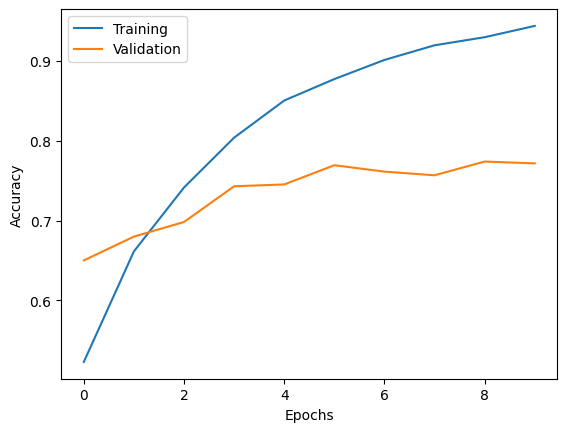

In [ ]:
best_model_epoch=np.argmax(model.history.history['val_acc'])+1 # epoch of best model
print("Best model epoch:", best_model_epoch)

plot_accuracy(model)

### 4. Generate predictions from X_test data and calculate accuracy


In [ ]:
loss_simple, accuracy_simple = model.evaluate(X_test_padded, y_test, batch_size = 1)
print("Accuracy on test dataset:", accuracy_simple)

1821/1821 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - acc: 0.8010 - loss: 0.4445
Accuracy on test dataset: 0.7924217581748962


### 5. Experiment with more models


In [ ]:
# Train model 2 using same preprocessor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Flatten

# input layer
inputs = tf.keras.Input(shape=(maxlen,))  # Input shape with sequence length

# Embedding layer
embedding_dim = 64
embedding_layer = tf.keras.layers.Embedding(
    tokenizer.num_words,
    embedding_dim
)(inputs)

#LSTM layer 1
LSTM_1 = tf.keras.layers.LSTM(embedding_dim, return_sequences=True)(embedding_layer)

#LSTM layer 2
LSTM_2 = tf.keras.layers.LSTM(embedding_dim//2, return_sequences=True)(LSTM_1)

#LSTM layer 3
LSTM_3 = tf.keras.layers.LSTM(embedding_dim//4)(LSTM_2)

# Add a dense layer for classification
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(LSTM_3)

# Define the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 100, 64)             │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 100, 64)             │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 32)             │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 688,593 (2.63 MB)

 Trainable params: 688,593 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training the model
history = model.fit(X_train_padded, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val_padded, y_val))

Epoch 1/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - acc: 0.5374 - loss: 0.6896 - val_acc: 0.6835 - val_loss: 0.5964
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - acc: 0.7088 - loss: 0.5647 - val_acc: 0.7431 - val_loss: 0.5157
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - acc: 0.8254 - loss: 0.3937 - val_acc: 0.7901 - val_loss: 0.4638
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - acc: 0.8872 - loss: 0.2876 - val_acc: 0.7821 - val_loss: 0.4918
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - acc: 0.9078 - loss: 0.2269 - val_acc: 0.7580 - val_loss: 0.5700
Epoch 6/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - acc: 0.9371 - loss: 0.1628 - val_acc: 0.7924 - val_loss: 0.6255
Epoch 7/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - acc: 0.9560 - loss: 0.1276 - val_acc: 0.7844 - val_loss: 0.6985
Epoch 8/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - acc: 0.9648 - loss: 0.1064 - val_acc: 0.7810 - val_loss: 0.7392
Epoch 9/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/

Best model epoch: 6


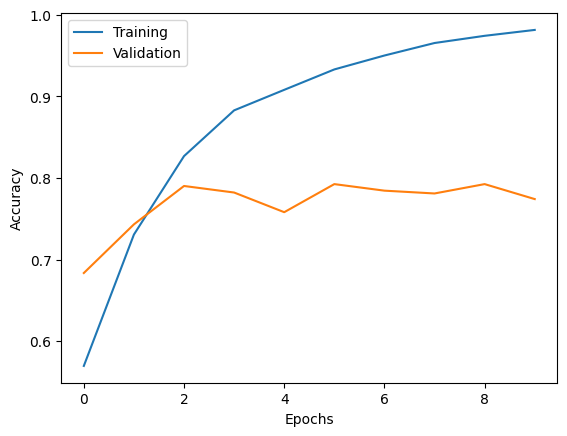

In [ ]:
# Plot history
best_model_epoch=np.argmax(model.history.history['val_acc'])+1 # epoch of best model
print("Best model epoch:", best_model_epoch)

plot_accuracy(model)

In [ ]:
loss_LSTM, accuracy_LSTM = model.evaluate(X_test_padded, y_test, batch_size = 1)
print("Accuracy on test dataset:", accuracy_LSTM)

1821/1821 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - acc: 0.7790 - loss: 0.8060
Accuracy on test dataset: 0.7775947451591492


**Does your model perform better or worse than your prior deep learning model? Why might that be the case?**

* The model has very similar results to the best previous model (SVC) with an accuracy of 0.778 on the test dataset compared to 0.792 on the previous one.
* Although the second one has more complexity, and the LSTM layers should improve the results, there is no obvious improvement in the test accuracy, which might be due to overfitting in the later epochs. Adding a dropout layer could improve the results.
* The first model has good accuracy and a more simple structure, which might be more preferable in this case. With longer sentences, the LSTM model might just do better.

### 6. Tune model within range of hyperparameters with Keras Tuner

*Consult [documentation](https://keras.io/guides/keras_tuner/getting_started/) to see full functionality.*

In [ ]:
! pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.5 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from kerastuner import HyperModel, HyperParameters
from kerastuner.tuners import RandomSearch

# Define the function that returns the model with tunable hyperparameters
def build_model(hp):
    model = models.Sequential()

    # Embedding layer: set fixed input dimension and output dimension
    model.add(layers.Embedding(input_dim=10000, output_dim=128, input_length=100))

    # Loop through the number of LSTM layers specified by the hyperparameter
    for i in range(hp.Int('num_lstm_layers', 1, 3)):  # 1 to 3 LSTM layers
        model.add(layers.LSTM(
            hp.Int(f'lstm_units_{i}', min_value=64, max_value=256, step=64),  # LSTM units
            return_sequences=True if i < hp.Int('num_lstm_layers', 1, 3) - 1 else False
        ))
        model.add(layers.Dropout(hp.Float('dropout_rate', 0.2, 0.5, step=0.1)))  # Dropout rate

    model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

    # Compile the model with an optimizer whose learning rate is also tunable
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
        ),
        loss='binary_crossentropy',  # Suitable for binary classification
        metrics=['accuracy']
    )

    return model

In [ ]:
import os
# Initialize Keras Tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',  # Objective to optimize
    max_trials=10,  # Number of different configurations to try
    executions_per_trial=2,  # Number of times to evaluate each model
    directory= os.getcwd(),  # Directory to store results
    project_name='LSTM_Keras_Tuner'
)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_lstm_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': 'linear'}
lstm_units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 64, 'sampling': 'linear'}
dropout_rate (Float)
{'default': 0.2, 'conditions': [], 'min_value': 0.2, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
learning_rate (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [ ]:
# Run the tuner
tuner.search(X_train_padded, y_train, epochs=10, batch_size=64, validation_data=(X_val_padded, y_val))

Trial 10 Complete [00h 00m 32s]
val_accuracy: 0.8056192696094513

Best val_accuracy So Far: 0.8056192696094513
Total elapsed time: 00h 09m 12s


In [ ]:
tuner.results_summary()

Results summary
Results in /content/LSTM_Keras_Tuner
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 09 summary
Hyperparameters:
num_lstm_layers: 1
lstm_units_0: 64
dropout_rate: 0.30000000000000004
learning_rate: 0.0010731280858402223
lstm_units_1: 64
lstm_units_2: 128
Score: 0.8056192696094513

Trial 08 summary
Hyperparameters:
num_lstm_layers: 1
lstm_units_0: 192
dropout_rate: 0.2
learning_rate: 0.0008161739188324943
lstm_units_1: 192
lstm_units_2: 192
Score: 0.7970183491706848

Trial 00 summary
Hyperparameters:
num_lstm_layers: 1
lstm_units_0: 128
dropout_rate: 0.4
learning_rate: 0.0021945906489750358
Score: 0.7964449524879456

Trial 06 summary
Hyperparameters:
num_lstm_layers: 2
lstm_units_0: 64
dropout_rate: 0.30000000000000004
learning_rate: 0.005306279417939182
lstm_units_1: 256
lstm_units_2: 128
Score: 0.7964449524879456

Trial 05 summary
Hyperparameters:
num_lstm_layers: 2
lstm_units_0: 192
dropout_rate: 0.4
learning_rate: 0.00010473593379759068


In [83]:
# Get the top hyperparameter.
print(tuner.get_best_hyperparameters()[0].values)
best_hps = tuner.get_best_hyperparameters()[0]

{'num_lstm_layers': 1, 'lstm_units_0': 64, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.0010731280858402223, 'lstm_units_1': 64, 'lstm_units_2': 128}


In [ ]:
from tensorflow.keras import models
# Build model with best hyperparameters
model = build_model(best_hps)
# Fit with the entire dataset.
history = model.fit(X_train_padded, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val_padded, y_val))

Epoch 1/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.5796 - loss: 0.6667 - val_accuracy: 0.7913 - val_loss: 0.4813
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8674 - loss: 0.3308 - val_accuracy: 0.7844 - val_loss: 0.4645
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9459 - loss: 0.1486 - val_accuracy: 0.7844 - val_loss: 0.5696
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9719 - loss: 0.0799 - val_accuracy: 0.7959 - val_loss: 0.7091
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9885 - loss: 0.0425 - val_accuracy: 0.7752 - val_loss: 0.7072
Epoch 6/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9927 - loss: 0.0305 - val_accuracy: 0.7856 - val_loss: 0.8818
Epoch 7/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9983 - loss: 0.0107 - val_accuracy: 0.7821 - val_loss: 1.0526
Epoch 8/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9976 - loss: 0.0083 - val_accu

Best model epoch: 4


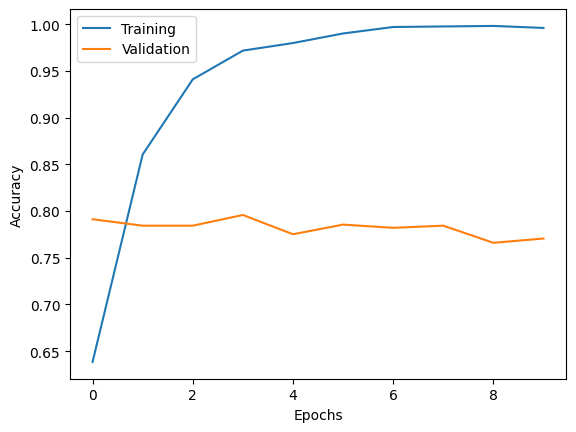

In [ ]:
# Plot history
model.history.history['acc'] = model.history.history.pop('accuracy')
model.history.history['val_acc'] = model.history.history.pop('val_accuracy')
best_model_epoch=np.argmax(model.history.history['val_acc'])+1 # epoch of best model
print("Best model epoch:", best_model_epoch)

plot_accuracy(model)

In [ ]:
loss_LSTM_tuned, accuracy_LSTM_tuned = model.evaluate(X_test_padded, y_test, batch_size = 1)
print("Accuracy on test dataset:", accuracy_LSTM_tuned)

1821/1821 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7883 - loss: 1.1623
Accuracy on test dataset: 0.7896760106086731


**What were the best hyperparameters found? Why might that be performing better than others?**

* The test accuracy has improved (compared to the previous LSTM model) and reached 0.790.
* The graph above shows that the training accuracy reaches 100% quickly and the test accuracy becomes flat, which might imply overfitting. This may be due to the fact that the tuning is done only over a short training. Increasing trial lenght my change the best hyperparameters results but it is a time consumming process.

The best hyperparameters found in our case are  
* 1 LMST layer
* with 64 units
* a dropout rate of 0.3
* and a learning rate of 0.001073

As anticipated, the tuning goes for a simpler model than our previous LMST model. Only one LMST layer of 64 units. Combine with a moderate dropout layer, it helps avoid overfitting while also retaining the key information to detect paterns.

The learning rate is pretty usual and ensure a good convergence.

A big way to improve tuning results would have been to increase the tuning space, but it is a very time consuming process.


## 3 more models

Train three more prediction models to try to predict the SST sentiment
dataset well.

○ Use Conv1d layers in first model

○ Use Transfer learning with Glove Embeddings for 2nd model

○ Third model can be any Transfer learning model of your choice (Transformer architecture required, eg. BERT and related)

### Conv1D Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Embedding, Dropout

# Define the Conv1D-based model
def build_conv1d_model():
    model = Sequential()

    # input layer
    model.add(Input(shape=(maxlen,)))  # Input shape with sequence length

    # Embedding Layer
    model.add(Embedding(input_dim=10000, output_dim=128, input_length=100))

    # 1D Convolutional Layer
    model.add(Conv1D(128, 5, activation='relu'))  # 128 filters, kernel size = 5

    # MaxPooling Layer
    model.add(MaxPooling1D(pool_size=2))

    # 1D Convolutional Layer
    model.add(Conv1D(64, 5, activation='relu'))  # 64 filters, kernel size = 5

    # MaxPooling Layer
    model.add(MaxPooling1D(pool_size=2))

    # Global Max Pooling
    model.add(GlobalMaxPooling1D())

    # Dropout Layer
    model.add(Dropout(0.5))

    # Fully Connected Layer
    model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

    return model

# Instantiate the model
model = build_conv1d_model()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 100, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 96, 128)             │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 48, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 44, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 22, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 64)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,403,137 (5.35 MB)

 Trainable params: 1,403,137 (5.35 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train_padded, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val_padded, y_val))

Epoch 1/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - acc: 0.5549 - loss: 0.6747 - val_acc: 0.7901 - val_loss: 0.4592
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8575 - loss: 0.3409 - val_acc: 0.7959 - val_loss: 0.4627
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9506 - loss: 0.1393 - val_acc: 0.7924 - val_loss: 0.5826
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9774 - loss: 0.0643 - val_acc: 0.7867 - val_loss: 0.8046
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9879 - loss: 0.0331 - val_acc: 0.7764 - val_loss: 1.0334
Epoch 6/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9928 - loss: 0.0191 - val_acc: 0.7821 - val_loss: 1.2405
Epoch 7/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9952 - loss: 0.0135 - val_acc: 0.7810 - val_loss: 1.3852
Epoch 8/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9977 - loss: 0.0079 - val_acc: 0.7706 - val_loss: 1.5616
Epoch 9/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - a

Best model epoch: 2


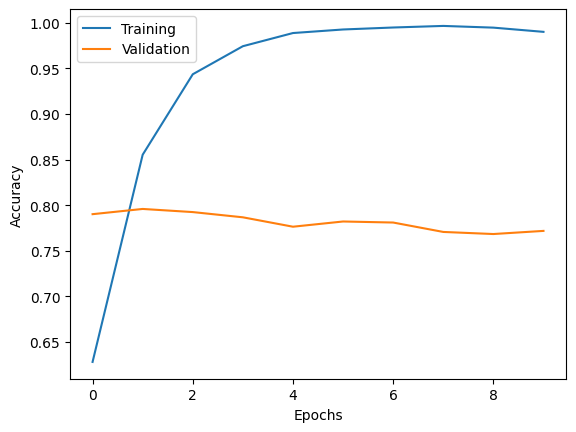

In [ ]:
# Plot history
best_model_epoch=np.argmax(model.history.history['val_acc'])+1 # epoch of best model
print("Best model epoch:", best_model_epoch)

plot_accuracy(model)

In [ ]:
loss_conv1D, accuracy_conv1D = model.evaluate(X_test_padded, y_test, batch_size = 1)
print("Accuracy on test dataset:", accuracy_conv1D)

1821/1821 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.7710 - loss: 1.4859
Accuracy on test dataset: 0.7732015252113342


### GloVE Embeddings model

In [ ]:
# Download Glove embedding matrix weights
! wget http://nlp.stanford.edu/data/wordvecs/glove.6B.zip

#Unzip
!unzip glove.6B.zip

--2024-12-13 02:30:59--  http://nlp.stanford.edu/data/wordvecs/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/wordvecs/glove.6B.zip [following]
--2024-12-13 02:30:59--  https://nlp.stanford.edu/data/wordvecs/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/wordvecs/glove.6B.zip [following]
--2024-12-13 02:30:59--  https://downloads.cs.stanford.edu/nlp/data/wordvecs/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182753 (822M) [app

In [ ]:
# Extract embedding data for 100 feature embedding matrix
glove_dir = os.getcwd()
word_index = tokenizer.word_index
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

# Build embedding matrix
embedding_dim = 100 # change if you use txt files using larger number of features

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 400001 word vectors.


In [ ]:
# Set up same model architecture as before and then import Glove weights to Embedding layer:

inputs = tf.keras.Input(shape=(maxlen,))  # Define input shape
embedding_layer = tf.keras.layers.Embedding(
    max_words,
    embedding_dim,
    embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
    trainable=False  # Freeze GloVe weights
)(inputs)

x = tf.keras.layers.LSTM(embedding_dim)(embedding_layer)
x = tf.keras.layers.Dense(32, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_3 (Embedding)              │ (None, 100, 100)            │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           3,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,083,665 (4.13 MB)

 Trainable params: 83,665 (326.82 KB)

 Non-trainable params: 1,000,000 (3.81 MB)

In [ ]:
history = model.fit(X_train_padded, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val_padded, y_val))

Epoch 1/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - acc: 0.6341 - loss: 0.6331 - val_acc: 0.6273 - val_loss: 0.6985
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.7428 - loss: 0.5241 - val_acc: 0.7810 - val_loss: 0.4608
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - acc: 0.7675 - loss: 0.4679 - val_acc: 0.7133 - val_loss: 0.5675
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - acc: 0.7902 - loss: 0.4345 - val_acc: 0.7982 - val_loss: 0.4450
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - acc: 0.8071 - loss: 0.3973 - val_acc: 0.8005 - val_loss: 0.4441
Epoch 6/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - acc: 0.8334 - loss: 0.3687 - val_acc: 0.7833 - val_loss: 0.4703
Epoch 7/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.8468 - loss: 0.3414 - val_acc: 0.7867 - val_loss: 0.4728
Epoch 8/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.8610 - loss: 0.3153 - val_acc: 0.8154 - val_loss: 0.4540
Epoch 9/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step -

Best model epoch: 8


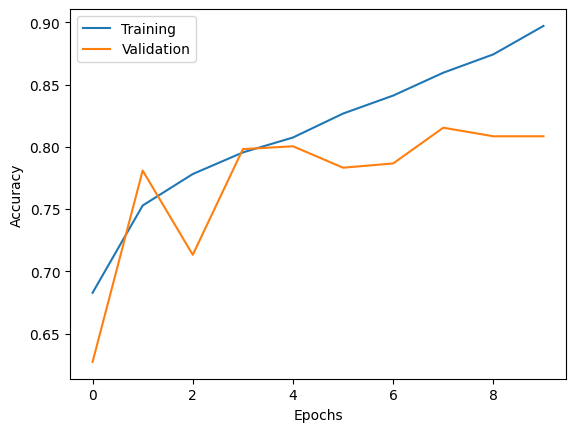

In [ ]:
# Plot history
best_model_epoch=np.argmax(model.history.history['val_acc'])+1 # epoch of best model
print("Best model epoch:", best_model_epoch)

plot_accuracy(model)

In [ ]:
loss_glove, accuracy_glove = model.evaluate(X_test_padded, y_test, batch_size = 1)
print("Accuracy on test dataset:", accuracy_glove)

1821/1821 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - acc: 0.7953 - loss: 0.5339
Accuracy on test dataset: 0.7946183681488037


### BERT model

In [ ]:
!pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


Change the column "sentiment" to "label".

In [ ]:
train_df.columns = ['label', 'review']
test_df.columns = ['label', 'review']

Convert the train and test dataframe to arrow datasets.

In [ ]:
import pyarrow as pa
import pyarrow.dataset as ds
import pandas as pd
from datasets import Dataset

### convert to Huggingface dataset
train_ds = Dataset(pa.Table.from_pandas(pd.DataFrame(train_df)))
test_ds = Dataset(pa.Table.from_pandas(pd.DataFrame(test_df)))

In [ ]:
type(train_ds)

datasets.arrow_dataset.Dataset

Examine an entry of the dataset object.

In [ ]:
train_ds[0]

{'label': 1,
 'review': 'a stirring , funny and finally transporting re-imagining of beauty and the beast and 1930s horror films'}

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments


# Load Tokenizer
# We'll use the pre-trained BERT tokenizer to process the text data
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize Data
# Tokenizing the input texts and padding/truncating them to a fixed length (512 tokens here)
def tokenize_function(examples):
    return tokenizer(examples['review'], padding="max_length", truncation=True, max_length=512)

# Apply the tokenizer to the dataset
train_tokenized = train_ds.map(tokenize_function, batched=True)
test_tokenized = test_ds.map(tokenize_function, batched=True)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/6920 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

In [ ]:
# Load Pre-trained BERT Model
# We'll use a BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Define Training Arguments
# Set up training configuration, like learning rate, number of epochs, etc.
training_args = TrainingArguments(
    output_dir="./results",          # output directory for the model and logs
    evaluation_strategy="epoch",     # evaluate every epoch
    learning_rate=2e-5,              # learning rate for fine-tuning
    per_device_train_batch_size=8,   # batch size for training
    per_device_eval_batch_size=16,   # batch size for evaluation
    num_train_epochs=3,              # number of epochs
    weight_decay=0.01,               # strength of weight decay (regularization)
    logging_dir="./logs",            # directory for logs
    report_to="none",
)

# Define Trainer
# Trainer is the main interface to train the model
trainer = Trainer(
    model=model,                     # the model to be trained
    args=training_args,              # training arguments
    train_dataset=train_tokenized,  # the training dataset
    eval_dataset=test_tokenized,    # the evaluation dataset
)

# Train the Model
trainer.train()

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,0.385000,0.243197
2,0.160600,0.359050
3,0.079500,0.402717


TrainOutput(global_step=2595, training_loss=0.1994246949579904, metrics={'train_runtime': 2147.2064, 'train_samples_per_second': 9.668, 'train_steps_per_second': 1.209, 'total_flos': 5462185509273600.0, 'train_loss': 0.1994246949579904, 'epoch': 3.0})

In [ ]:
print(model)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
# Evaluate the Model
results = trainer.evaluate()
print(results)

{'eval_loss': 0.4027172029018402, 'eval_runtime': 52.715, 'eval_samples_per_second': 34.544, 'eval_steps_per_second': 2.163, 'epoch': 3.0}


In [ ]:
test_results = trainer.predict(test_tokenized)
print(test_results.metrics)

{'test_loss': 0.4027172029018402, 'test_runtime': 53.6907, 'test_samples_per_second': 33.917, 'test_steps_per_second': 2.123}


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
test_preds = test_results.predictions.argmax(axis=1)  # Predicted labels
test_labels = test_results.label_ids  # True labels

# Calculate accuracy
test_accuracy = accuracy_score(test_labels, test_preds)

print(f"Test Accuracy: {test_accuracy:.4f}")

print("\nTest Classification Report:")
print(classification_report(test_labels, test_preds, digits=4))

Test Accuracy: 0.9154

Test Classification Report:
              precision    recall  f1-score   support

           0     0.9346    0.8936    0.9137       912
           1     0.8978    0.9373    0.9171       909

    accuracy                         0.9154      1821
   macro avg     0.9162    0.9155    0.9154      1821
weighted avg     0.9162    0.9154    0.9154      1821



**Tabularize results from ALL your models in this notebook and compare performance**

In [ ]:
results = {
    'Model': ['RandomForestClassifier', 'KNeighborsClassifier', 'BaggingClassifier', 'GradientBoostingClassifier', 'SuportVectorClassifier', 'SimpleEmbedding', 'LSTM', 'LSTM_tuned', 'Conv1D', 'GloVe', 'BERT'],
    'Accuracy': [accuracy_tree, accuracy_knn, accuracy_bagging, accuracy_gb, accuracy_svc, accuracy_simple, accuracy_LSTM, accuracy_LSTM_tuned, accuracy_conv1D, accuracy_glove, test_accuracy],
}

# Create a DataFrame from the dictionary
results_df = pd.DataFrame(results)

# Display the table
print(results_df)

                         Model  Accuracy
0       RandomForestClassifier  0.721582
1         KNeighborsClassifier  0.506864
2            BaggingClassifier  0.669962
3   GradientBoostingClassifier  0.657880
4       SuportVectorClassifier  0.796266
5              SimpleEmbedding  0.792422
6                         LSTM  0.777595
7                   LSTM_tuned  0.789676
8                       Conv1D  0.773202
9                        GloVe  0.794618
10                        BERT  0.915431


* BERT achieves the highest accuracy (0.915), indicating that it is the most effective model for the task. This is because BERT uses contextual embeddings and pretraining on large-scale text data, which significantly boosts performance on language tasks.

* SupportVectorClassifier (0.796), GloVe (0.794), and SimpleEmbedding (0.792) perform well, though not as high as BERT.
These methods likely benefit from relatively simpler architectures that still effectively capture text patterns on our rather short samples.

* The LSTM (0.778) and LSTM_tuned (0.790) demonstrate that tuning improves performance but not significantly enough to surpass simpler embedding methods or GloVe.

* Traditional models like RandomForestClassifier (0.722), BaggingClassifier (0.670), and GradientBoostingClassifier (0.658) perform poorly. These models don't have text embeddings, which limits their ability to capture linguistic nuances.

* KNeighborsClassifier (0.507) performs the worst because it does not handle high-dimensional data effectively.A different metric could improve its results.

**Results Discussion : Point out why specific models may have performed better than others. and discuss failures if any.**
* Many of the models like LSTM have high complexity, which makes them prone to overfitting. The model fits train set well but fails to generalize to validation set.

* Pretrained language models like BERT are superior for the task due to their pretraining that models contextual dependencies and reduces overfitting.

* Simpler embeddings like GloVe or SimpleEmbedding still perform decently, providing a good trade-off between performance and computational cost.

* Classical ML models like RandomForest or GradientBoosting struggle with text data compared to neural network-based models and embeddings because they don't capture linguistic dependences. SVC still holds good performances. One reason could be that SVC can handle high-dimensional data which is common in the sentiment analysis.